In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import ipdb
from models import LinearRegression, OWL, EN, Lasso, Ridge
from gendata import *
from utils import *

%load_ext autoreload
%autoreload 2

## Test univariate linear regression

### TEST BASIC ###
FISTA training begins:
iter =    0, loss = 2.855603
iter =   50, loss = 0.002552
iter =  100, loss = 0.004665
FISTA training exits after 108 iterations, with loss=6.86E-03 and eps=6.91E-06

ypred = [ 1.06499767  2.49187529], ytrue = [ 1.   2.5]
learned coef = [ 0.95125175], true coef = [1]
learned intercept = 1.0649976703562833, true intercept = 1


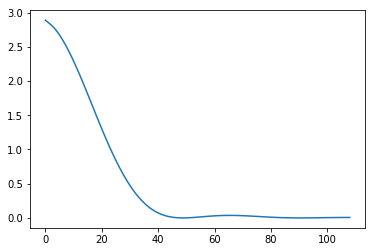

### TEST NORMALIZE ###
FISTA training begins:
iter =    0, loss = 2.885038
iter =   50, loss = 1.733166
iter =  100, loss = 0.318135
iter =  150, loss = 0.001604
iter =  200, loss = 0.044733
iter =  250, loss = 0.004818
iter =  300, loss = 0.006763
FISTA training exits after 323 iterations, with loss=9.95E-03 and eps=7.04E-06

ypred = [ 1.07822897  2.49022138], ytrue = [ 1.   2.5]
learned coef = [ 0.94132827], true coef = [1]
learned intercept = 1.0782289695024723, true intercept = 1


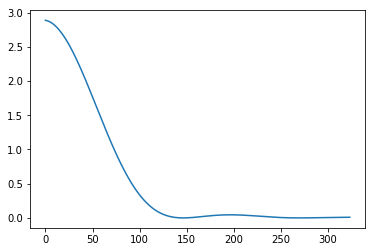

### TEST NOT FIT_INTERCEPT ###
FISTA training begins:
iter =    0, loss = 8.190005
iter =   50, loss = 0.708894
iter =  100, loss = 0.619586
iter =  150, loss = 0.620659
FISTA training exits after 183 iterations, with loss=6.20E-01 and eps=8.71E-06

learned coef = [ 1.29766348], true coef = [ 1.28571429]
learned intercept = 0.0, true intercept = 0.0


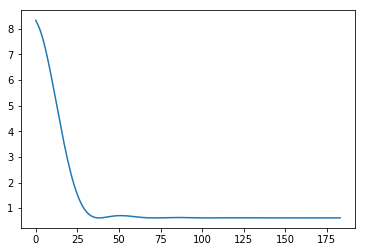

In [2]:
Xtrain, ytrain, Xtest, ytest, coef_true, intercept_true = generate_data_0()
num_features = Xtrain.shape[1]
num_train = Xtrain.shape[0]
num_test = Xtest.shape[0]

print("### TEST BASIC ###")
model = OWL(weight=[0], tol=1e-5)
model.set_training_data(inputs=Xtrain, outputs=ytrain)
model.fit()
ypred = model.produce(inputs=Xtest)
print("ypred = {}, ytrue = {}".format(ypred, ytest))
print("learned coef = {}, true coef = {}".format(model.coef, coef_true))
print("learned intercept = {}, true intercept = {}".format(model.intercept, intercept_true))
plt.plot(model.loss_history)
plt.show()

print("### TEST NORMALIZE ###")
model = OWL(weight=[0], normalize=True, tol=1e-5)
model.set_training_data(inputs=Xtrain, outputs=ytrain)
model.fit()
ypred = model.produce(inputs=Xtest)
print("ypred = {}, ytrue = {}".format(ypred, ytest))
print("learned coef = {}, true coef = {}".format(model.coef, coef_true))
print("learned intercept = {}, true intercept = {}".format(model.intercept, intercept_true))
plt.plot(model.loss_history)
plt.show()

print("### TEST NOT FIT_INTERCEPT ###")
model = OWL(weight=[0], fit_intercept=False, tol=1e-5)
model.set_training_data(inputs=Xtrain, outputs=ytrain)
model.fit()
ypred = model.produce(inputs=Xtest)
coef_true = np.linalg.pinv(Xtrain).dot(ytrain)
intercept_true = 0.0
#print("ypred = {}, ytrue = {}".format(ypred, ytrue))
print("learned coef = {}, true coef = {}".format(model.coef, coef_true))
print("learned intercept = {}, true intercept = {}".format(model.intercept, intercept_true))
plt.plot(model.loss_history)
plt.show()

## Test EN

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


FISTA training begins:
FISTA training exits after 10000 iterations, with loss=4.41E-01 and eps=4.91E-05



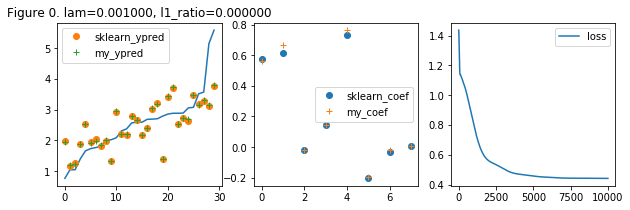

FISTA training begins:
FISTA training exits after 10000 iterations, with loss=4.42E-01 and eps=4.94E-05



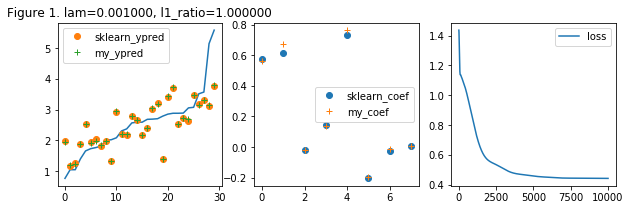

FISTA training begins:
FISTA training exits after 10000 iterations, with loss=7.80E-01 and eps=2.10E-05



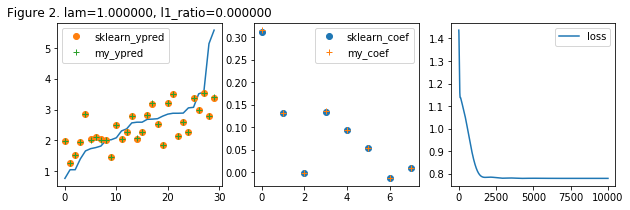

FISTA training begins:
FISTA training exits after 5601 iterations, with loss=1.10E+00 and eps=9.34E-07



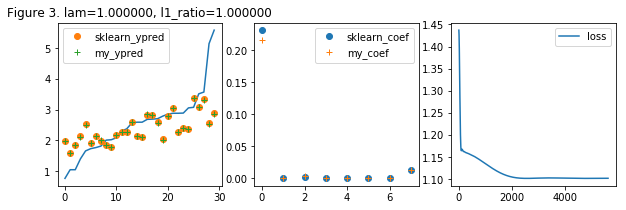

In [3]:
from sklearn.linear_model import ElasticNet
import itertools

Xtrain, ytrain, Xtest, ytest, _, _ = get_prostate_cancer_data()
num_features = Xtrain.shape[1]
num_train = Xtrain.shape[0]
num_test = Xtest.shape[0]

lam = 1e-2
l1_ratio = 0.5
for idx, (lam, l1_ratio) in enumerate(itertools.product([1e-3, 1], [0, 1])):
    lam_sk = lam * (2 - l1_ratio) / 2
    l1_ratio_sk = l1_ratio / (2 - l1_ratio)
    sk_en = ElasticNet(alpha=lam_sk, l1_ratio=l1_ratio_sk)
    sk_en.fit(Xtrain, ytrain)
    sk_en_ypred = sk_en.predict(Xtest)

    my_en = EN(lam=lam, l1_ratio=l1_ratio, max_iter=10000, learning_rate=1e-6, tol=1e-6, verbose=1)
    my_en.set_training_data(inputs=Xtrain, outputs=ytrain)
    my_en.fit()
    my_en_ypred = my_en.produce(inputs=Xtest)

    plt.figure(figsize=(10,3))
    plt.subplot(1,3,1)
    plt.plot(ytest)
    plt.plot(sk_en_ypred, 'o', label='sklearn_ypred')
    plt.plot(my_en_ypred, '+', label='my_ypred')
    plt.legend()
    plt.title("Figure {:d}. lam={:f}, l1_ratio={:f}".format(
        idx, lam, l1_ratio))
    
    plt.subplot(1,3,2)
    plt.plot(sk_en.coef_, 'o', label='sklearn_coef')
    plt.plot(my_en.coef, '+', label='my_coef')
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.plot(my_en.loss_history, label='loss')
    plt.legend()
    
    plt.show()
    plt.close()

## Test Lasso

FISTA training begins:
FISTA training exits after 10000 iterations, with loss=4.42E-01 and eps=5.17E-06



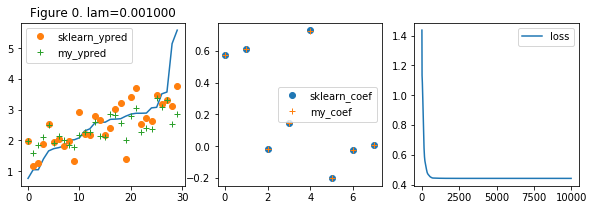

FISTA training begins:
FISTA training exits after 10000 iterations, with loss=4.62E-01 and eps=7.70E-06



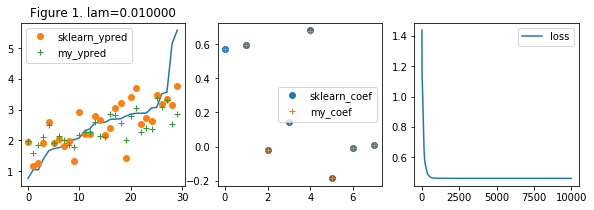

FISTA training begins:
FISTA training exits after 1614 iterations, with loss=1.10E+00 and eps=6.48E-07



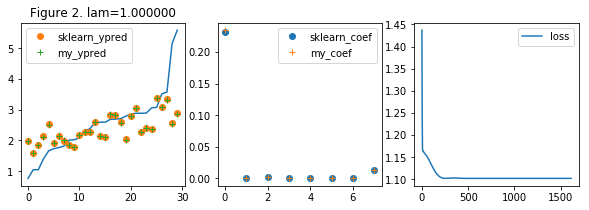

In [4]:
from sklearn.linear_model import Lasso as sk_Lasso

Xtrain, ytrain, Xtest, ytest, _, _ = get_prostate_cancer_data()
num_features = Xtrain.shape[1]
num_train = Xtrain.shape[0]
num_test = Xtest.shape[0]

lam = 1e-2
for idx, lam in enumerate([1e-3, 1e-2, 1e0]):
    sk_lasso = sk_Lasso(alpha=lam/2) # Notice lam / 2
    sk_lasso_ypred = sk_lasso.fit(Xtrain, ytrain).predict(Xtest)

    my_lasso = Lasso(lam=lam, max_iter=10000, learning_rate=1e-4, tol=1e-6, verbose=1)
    my_lasso.set_training_data(inputs=Xtrain, outputs=ytrain)
    my_lasso.fit()
    my_lasso_ypred = my_en.produce(inputs=Xtest)

    plt.figure(figsize=(10,3))
    plt.subplot(1,3,1)
    plt.plot(ytest)
    plt.plot(sk_lasso_ypred, 'o', label='sklearn_ypred')
    plt.plot(my_lasso_ypred, '+', label='my_ypred')
    plt.legend()
    plt.title("Figure {:d}. lam={:f}".format(
        idx, lam))
    
    plt.subplot(1,3,2)
    plt.plot(sk_lasso.coef_, 'o', label='sklearn_coef')
    plt.plot(my_lasso.coef, '+', label='my_coef')
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.plot(my_lasso.loss_history, label='loss')
    plt.legend()
    
    plt.show()
    plt.close()

## Test multivariate linear regression, with group sparse features

### TEST BASIC ###
FISTA training begins:
iter =    0, loss = 1.145867
iter =  500, loss = 1.131291
iter = 1000, loss = 1.095284
iter = 1500, loss = 1.054085
iter = 2000, loss = 1.022419
iter = 2500, loss = 1.005894
iter = 3000, loss = 1.001124
iter = 3500, loss = 1.001380
iter = 4000, loss = 1.001950
iter = 4500, loss = 1.001593
iter = 5000, loss = 1.000916
iter = 5500, loss = 1.000510
iter = 6000, loss = 1.000389
iter = 6500, loss = 1.000360
iter = 7000, loss = 1.000332
iter = 7500, loss = 1.000302
iter = 8000, loss = 1.000259
iter = 8500, loss = 1.000199
iter = 9000, loss = 1.000149
iter = 9500, loss = 1.000134
FISTA training exits after 10000 iterations, with loss=1.00E+00 and eps=3.03E-05

testset predictions: mse = 1.1359033846206625, relative_error = 1.0
learned intercept = 0.0, true intercept = 0.0


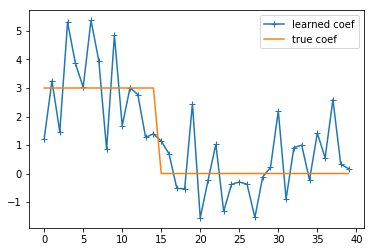

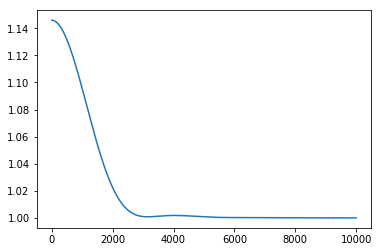

In [5]:
Xtrain, ytrain, Xtest, ytest, coef_true, intercept_true = generate_data_2()
num_features = Xtrain.shape[1]
num_train = Xtrain.shape[0]
num_test = Xtest.shape[0]

print("### TEST BASIC ###")
#Model_classes = [OWL, EN, Lasso, Ridge, LinearRegression]
#Model_names = {Model.__name__: Model for Model in Models_class}
Model_hps = {
    'OWL': {
        'weight': np.linspace(1e-5, 1e-6, num_features),
        'fit_intercept': False,
        'learning_rate': 1e-3,
        'tol': -1e-5,
        'max_iter': 10000,
    },
    'EN': {
        'lam': 3e-3,
        'l1_ratio': 0.8,
        'learning_rate': 1e-2,
        'tol': 1e-5,
        'max_iter': 5000,
    },
    'Lasso': {
        'lam': 4e-2,
        'learning_rate': 1e-2,
        'tol': 1e-5,
        'max_iter': 5000,
    },
    'Ridge': {
        'lam': 4e-2,
        'learning_rate': 1e-2,
        'tol': 1e-5,
        'max_iter': 5000,
    },
    'LinearRegression': {
        'learning_rate': 1e-3,
        'tol': 1e-5,
        'max_iter': 10000,
    },
}

Model = OWL
model = Model(**Model_hps[Model.__name__])

model.set_training_data(inputs=Xtrain, outputs=ytrain)
model.fit()
ypred = model.produce(inputs=Xtest)

print("testset predictions: mse = {}, relative_error = {}".format(
    np.mean((ypred - ytest)**2), rel_error(ypred, ytest)))
print("learned intercept = {}, true intercept = {}".format(model.intercept, intercept_true))
plt.plot(model.coef, '+-', label='learned coef')
plt.plot(coef_true, label='true coef')
plt.legend()
plt.show()

plt.plot(model.loss_history)
plt.show()

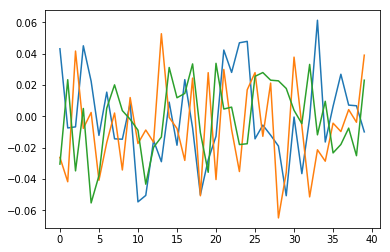

In [6]:
plt.plot(Xtrain[:3,:].T)
plt.show()

## Test on the prostate cancer data

In [4]:
Xtrain, ytrain, Xtest, ytest, _, _ = get_prostate_cancer_data()
num_features = Xtrain.shape[1]
num_train = Xtrain.shape[0]
num_test = Xtest.shape[0]

# Hyperparameter tuning
mse_test = {}
coef = {}
ypred = {}

### CROSS VAL ###
FISTA training begins:
FISTA training exits after 5000 iterations, with loss=4.39E-01 and eps=7.54E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=4.52E-01 and eps=7.20E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=4.66E-01 and eps=6.72E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=4.96E-01 and eps=3.38E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=5.54E-01 and eps=5.00E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=6.59E-01 and eps=4.65E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=8.41E-01 and eps=3.24E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=1.12E+00 and eps=4.80E-05



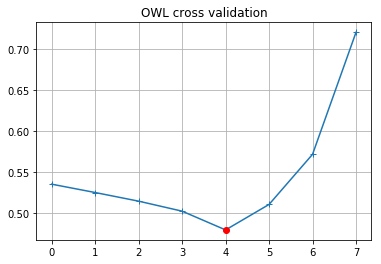

### TEST ###
FISTA training begins:
FISTA training exits after 5000 iterations, with loss=5.55E-01 and eps=3.99E-05

test mse = 0.486482


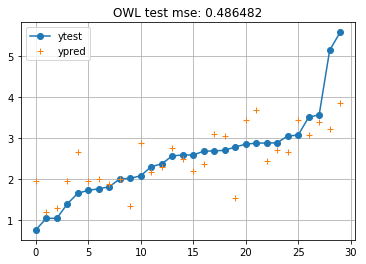

In [63]:
# OWL
search_list = [0.0]
search_list.extend(np.logspace(-3, -1, 7).tolist())
hp_dict = {
    'fit_intercept': True,
    'normalize': True,
    'learning_rate': 1e-3,
    'tol': 1e-6,
    'max_iter': 5000,
    'verbose': 1
}

Model = OWL
tuning_hp_name = 'weight'
tuning_hp_list = [np.linspace(val, 0, num_features) for val in search_list]

mse_test[Model.__name__], coef[Model.__name__], ypred[Model.__name__] = tune_test(
    Model, Xtrain, ytrain, Xtest, ytest, tuning_hp_name, tuning_hp_list, hp_dict)

### CROSS VAL ###
FISTA training begins:
FISTA training exits after 10000 iterations, with loss=4.39E-01 and eps=2.28E-05

FISTA training begins:
FISTA training exits after 10000 iterations, with loss=4.77E-01 and eps=2.04E-05

FISTA training begins:
FISTA training exits after 10000 iterations, with loss=5.13E-01 and eps=1.90E-05

FISTA training begins:
FISTA training exits after 10000 iterations, with loss=5.73E-01 and eps=1.15E-05

FISTA training begins:
FISTA training exits after 10000 iterations, with loss=6.66E-01 and eps=1.29E-05

FISTA training begins:
FISTA training exits after 10000 iterations, with loss=8.07E-01 and eps=8.74E-06

FISTA training begins:
FISTA training exits after 10000 iterations, with loss=1.00E+00 and eps=6.50E-06

FISTA training begins:
FISTA training exits after 10000 iterations, with loss=1.22E+00 and eps=4.31E-06



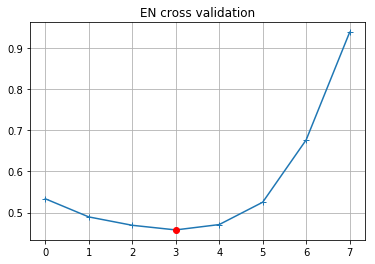

### TEST ###
FISTA training begins:
FISTA training exits after 10000 iterations, with loss=5.72E-01 and eps=1.43E-05

test mse = 0.482956


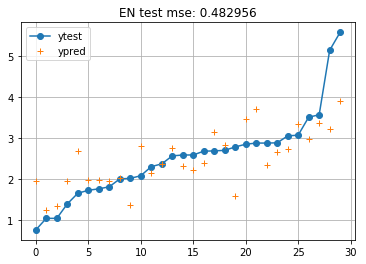

In [62]:
# EN
search_list = [0.0]
search_list.extend(np.logspace(-3, -1, 7).tolist())
hp_dict = {
    'l1_ratio': 0.5,
    'fit_intercept': True,
    'normalize': True,
    'learning_rate': 1e-3,
    'tol': 1e-6,
    'max_iter': 5000,
    'verbose': 1
}

Model = EN
tuning_hp_name = 'lam'
tuning_hp_list = search_list

mse_test[Model.__name__], coef[Model.__name__], ypred[Model.__name__] = tune_test(
    Model, Xtrain, ytrain, Xtest, ytest, tuning_hp_name, tuning_hp_list, hp_dict)

### CROSS VAL ###
FISTA training begins:
FISTA training exits after 5000 iterations, with loss=4.39E-01 and eps=7.54E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=4.57E-01 and eps=6.70E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=4.66E-01 and eps=6.28E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=4.77E-01 and eps=5.62E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=4.94E-01 and eps=3.52E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=5.16E-01 and eps=5.60E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=5.46E-01 and eps=3.76E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=5.86E-01 and eps=2.18E-05



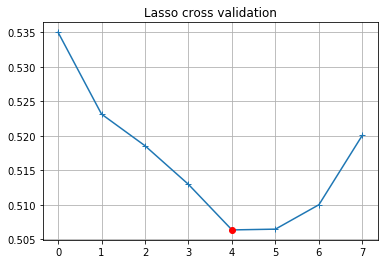

### TEST ###
FISTA training begins:
FISTA training exits after 5000 iterations, with loss=4.93E-01 and eps=5.97E-05

test mse = 0.493386


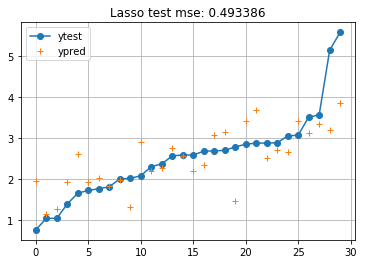

In [61]:
# Lasso
search_list = [0.0]
search_list.extend(np.logspace(-3, -2, 7).tolist())
hp_dict = {
    'fit_intercept': True,
    'normalize': True,
    'learning_rate': 1e-3,
    'tol': 1e-6,
    'max_iter': 5000,
    'verbose': 1
}

Model = Lasso
tuning_hp_name = 'lam'
tuning_hp_list = search_list

mse_test[Model.__name__], coef[Model.__name__], ypred[Model.__name__] = tune_test(
    Model, Xtrain, ytrain, Xtest, ytest, tuning_hp_name, tuning_hp_list, hp_dict)

### CROSS VAL ###
FISTA training begins:
FISTA training exits after 5000 iterations, with loss=3.15E-01 and eps=6.77E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=4.56E-01 and eps=7.25E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=3.57E-01 and eps=4.91E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=4.73E-01 and eps=6.26E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=4.15E-01 and eps=4.72E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=3.43E-01 and eps=2.83E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=5.16E-01 and eps=5.37E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=4.03E-01 and eps=2.61E-05

FISTA training begins:
FISTA training exits after 5000 iterations, with loss=5.22E-01 and eps=2.76E-05

FISTA training begins:
FISTA training exits af

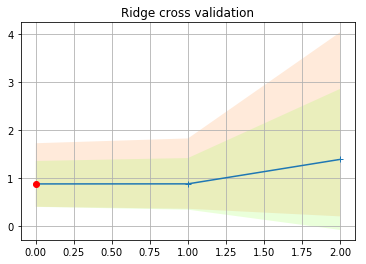

### TEST ###
FISTA training begins:
FISTA training exits after 5000 iterations, with loss=4.39E-01 and eps=2.97E-05

test mse = 0.527232


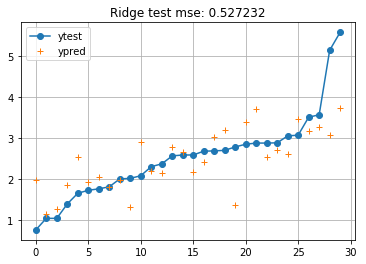

In [10]:
# Ridge
search_list = [0.0]
search_list.extend(np.logspace(-3, -1, 2).tolist())
hp_dict = {
    'fit_intercept': True,
    'normalize': True,
    'learning_rate': 1e-3,
    'tol': 1e-6,
    'max_iter': 5000,
    'verbose': 1
}

Model = Ridge
tuning_hp_name = 'lam'
tuning_hp_list = search_list

mse_test[Model.__name__], coef[Model.__name__], ypred[Model.__name__] = tune_test(
    Model, Xtrain, ytrain, Xtest, ytest, tuning_hp_name, tuning_hp_list, hp_dict)

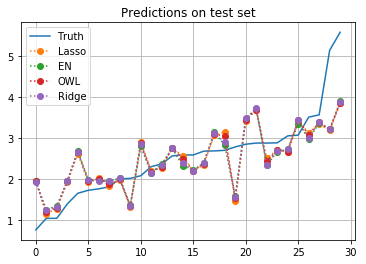

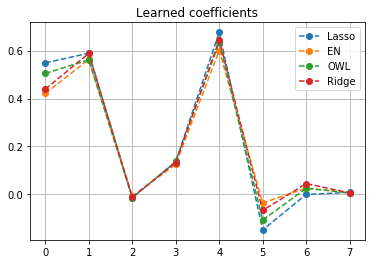

In [78]:
viewPerformanceCamp(ypred, ytest, coef, None)

In [57]:
%reload_ext autoreload